In [1]:
def Two_stacks_on_Z(m,n,p,q):
    r'''Inputs: Integers m, n, p and q with p <= q
    Returns (S,c) where S = The sandpile corresponding to a graph on Z 
    in [p-max(n,m)-1,q+max(n,m)+1] with a single undirected edge between (i,i+1) with sink at (q+max(n,m)+1)
    and c = the configuration on S with m chips at vertex p and n chips at vertex q'''
    if p>q:
        raise ValueError("p should be less than or equal to q")
    k = max(n,m)
    G = {i:{(i-1):1,(i+1):1} for i in range((p-k),(q+k+1))}
    G = {**G, **{(p-k-1):{(p-k):1}},**{(q+k+1):{(q+k):1}}}
    S = Sandpile(G, q+k+1)
    A = [0 for _ in range(0,(q-p+2*k+2))]; A[k+1] = m; A[-k-1] = n
    c = SandpileConfig(S, A)
    return S,c

In [2]:
def word(A):
    r'''Input: A list A
    Returns the word corresponding to a list. e.g.[a,b,c] --> abc'''
    return '.'.join(map(str, A))

def Config_poset(S,c):
    r'''Inputs: A sandpile S and a configuration c on S
    Returns (P,d) where P = the configuration poset on the sandpile S starting with configuration c and 
    d = The dictionary mapping each tuple (a,b) where b covers a in P to the label of the vertex which was fired
    in the process b --> a'''
    from collections import defaultdict
    from queue import Queue
    covers, queue, edge_labels = defaultdict(list), Queue(), dict()
    queue.put(c)
    while not queue.empty():
        conf = queue.get()
        for i in conf:
            if S.out_degree(i) <= conf[i]:
                new_conf = conf.fire_vertex(i)
                if word(new_conf.values()) not in covers:
                    queue.put(new_conf)
                covers[word(new_conf.values())].append(word(conf.values()))
                edge_labels[(word(new_conf.values()),word(conf.values()))] = i
    return LatticePoset(covers), edge_labels

In [3]:
def show_Config_poset(S,c):
    r'''Inputs: A sandpile S and a configuration c on S
    Returns the hasse diagram (with figure size k) of the configuration poset on the sandpile S starting with configuration c'''
    P, d = Config_poset(S,c)
    return P.plot(figsize = P.height(), element_size = 400, cover_labels = d)

In [4]:
def Firing_poset(S,c):
    r'''Inputs: A sandpile S, a configuration c on S
    Returns (F,d) where F = the firing poset on the sandpile S starting with configuration c
    and d = Internal(The dictionary specifying the labels of vertices in the hasse diagram of F)'''
    P,d = Config_poset(S,c)
    labels = {initial: move for (final, initial), move in d.items() if initial in P.join_irreducibles()}
    return P.subposet(P.join_irreducibles()), labels
    # return P.subposet(P.join_irreducibles()).plot(figsize = k, element_size = 400, element_labels = labels) 

In [5]:
def show_Firing_poset(S,c):
    r'''Inputs: A sandpile S, a configuration c on S
    Returns the hasse diagram of the firing poset on the sandpile S starting with configuration c'''
    P,d = Config_poset(S,c)
    F_poset, labels = Firing_poset(S,c)
    graph_plot = F_poset.hasse_diagram().graphplot(layout="acyclic", vertex_labels = labels)
    new_pos = {i: (labels[i], graph_plot._pos[i][1]) for i in P.join_irreducibles()}
    return F_poset.hasse_diagram().graphplot(pos = new_pos, vertex_labels = labels).show(figsize = F_poset.height())

In [6]:
def Firing_poset_stacks(m,n,p,q):
    r'''Inputs: Integers m, n, p and q
    Returns (F,d) where F = the firing poset on Z starting with the configuration which has m chips at vertex p and n chips at vertex q
    and d = Internal(The dictionary specifying the labels of vertices in the hasse diagram of F)'''
    S,c = Two_stacks_on_Z(m,n,p,q)
    return Firing_poset(S,c)

In [7]:
def show_Firing_poset_stacks(m,n,p,q):
    r'''Inputs: Integers m, n, p and q
    Returns the hasse diagram of the firing poset on Z starting with the configuration which has m chips at vertex p and n chips at vertex q'''
    S,c = Two_stacks_on_Z(m,n,p,q)
    return show_Firing_poset(S,c)

In [9]:
def finalconfig(m,n,p,q):
    r''' Inputs: Integers m,n,p,q
    Returns (Length of the first contiguous piece, Length of the second contiguous piece, Gap vertex) in the stabilisation of configuration with m chips at p and n chips at q'''
    c = Two_stacks_on_Z(m,n,p,q)[1]
    A = c.stabilize().values()
    sum = 0
    k = 0
    for i in range(0,len(A)):
        if A[i] == 1:
            sum+=1
            if A[i+1] == 0:
                k = i - max(n,m)
                break
    print (sum,m+n-sum, k)

In [12]:
def show_Firing_poset_Z(n):
    r'''Inputs: Integers n
    Returns the hasse diagram of the firing poset on Z starting with the configuration which has n chips at the origin'''
    return show_Firing_poset_stacks(0,n,0,0)

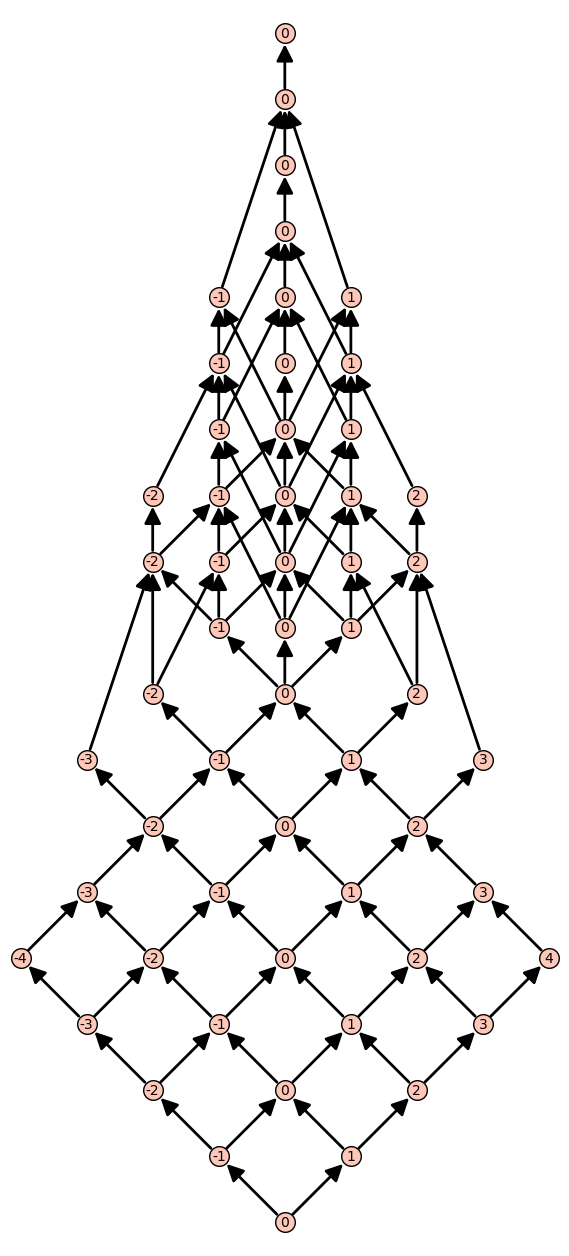

In [13]:
show_Firing_poset_Z(10)